In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [3]:
# Load dataset
df = pd.read_csv("Iris.csv")

In [5]:
# Drop ID column
df.drop("Id", axis=1, inplace=True)

In [7]:
# Encode target labels
df["Species"] = df["Species"].astype("category").cat.codes

In [9]:
# Features and target
X = df.drop("Species", axis=1).values
y = df["Species"].values

In [11]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [15]:
#Training KNN with Different K Values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print(f"K = {k} | Accuracy = {acc:.2f}")


K = 1 | Accuracy = 0.98
K = 3 | Accuracy = 1.00
K = 5 | Accuracy = 1.00
K = 7 | Accuracy = 1.00
K = 9 | Accuracy = 1.00


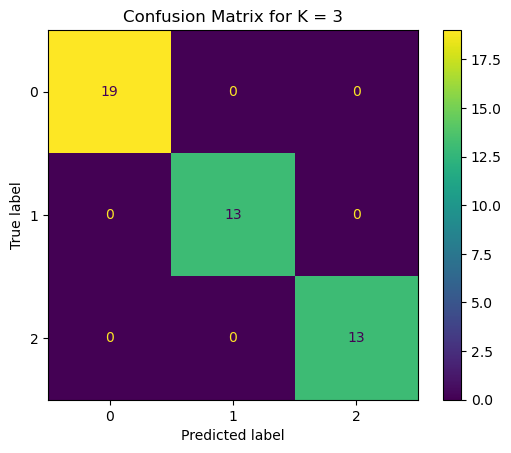

In [21]:
#Evaluation with Confusion Matrix
best_k = k_values[np.argmax(accuracies)]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Recover label names
display_labels = df["Species"].astype("category").cat.categories

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.title(f'Confusion Matrix for K = {best_k}')
plt.show()


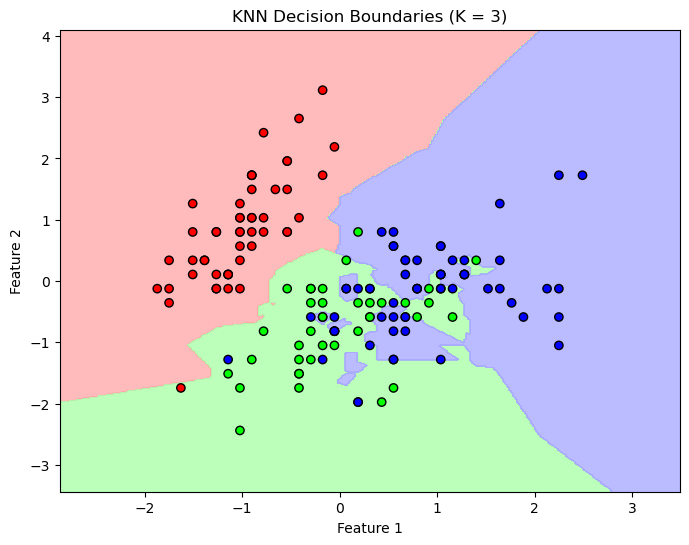

In [24]:
#Visualization Decision Boundaries (2D Projection)
# Select 2 features for visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title(f"KNN Decision Boundaries (K = {best_k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()